## **1. Загрузить любой набор данных с https://www.kaggle.com, подходящий к задачам классификации и регрессии: существуют различные классы объектов (для задачи классификации) или есть характерная целевая числовая характеристика, зависящая от ряда свойств (для задач регрессии).**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
df = pd.read_csv('heart_cleveland_upload.csv')

#Для использования методов, использующих метрику, необходимо произвести нормализацию значений признаков
vMin = df.min( axis = 0 )
x = (df - vMin) / (df.max( axis = 0 ) - vMin)

## **2. Выполнить классификацию метод K ближайших соседей :**

In [2]:
#1. Выполнить разбиение исходного набора на обучающую и тестовую выборки.
xTrain, xTest, yTrain, yTest = train_test_split(x, df['sex'], test_size = 0.33, shuffle = True)

#1.1. Применить алгоритм классификации для различного количества соседей (3,5,7)
#3 соседа
Knn3 = KNeighborsClassifier(n_neighbors = 3)
Knn3.fit(xTrain, yTrain)
yPred3 = Knn3.predict(xTest)
yPred3

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [3]:
#5 соседей
Knn5 = KNeighborsClassifier(n_neighbors = 5)
Knn5.fit(xTrain, yTrain)
yPred5 = Knn5.predict(xTest)
yPred5

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [4]:
#7 соседей
Knn7 = KNeighborsClassifier(n_neighbors = 7)
Knn7.fit(xTrain, yTrain)
yPred7 = Knn7.predict(xTest)
yPred7

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [5]:
yTest

79     0
269    1
153    1
9      1
211    1
      ..
237    1
163    1
155    1
13     0
267    1
Name: sex, Length: 99, dtype: int64

In [6]:
#1.2. Сравнить предсказание с метками тестовой выборки
#3 соседа
yTest==yPred3

79     True
269    True
153    True
9      True
211    True
       ... 
237    True
163    True
155    True
13     True
267    True
Name: sex, Length: 99, dtype: bool

In [7]:
#5 соседей
yTest==yPred5

79     True
269    True
153    True
9      True
211    True
       ... 
237    True
163    True
155    True
13     True
267    True
Name: sex, Length: 99, dtype: bool

In [8]:
#7 соседей
yTest==yPred7

79     True
269    True
153    True
9      True
211    True
       ... 
237    True
163    True
155    True
13     True
267    True
Name: sex, Length: 99, dtype: bool

In [9]:
#1.3. Объяснить, какой из какой из параметров метода дает лучший результат
unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred3, return_counts=True)
print(f"3 соседа\nКол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred5, return_counts=True)
print(f"5 соседей\nКол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

unique, testCounts = np.unique(yTest, return_counts=True)
unique, predCounts = np.unique(yPred7, return_counts=True)
print(f"7 соседей\nКол-во меток классов в тестовой: {testCounts},\nКол-во меток классов в предсказании: {predCounts}")

3 соседа
Кол-во меток классов в тестовой: [34 65],
Кол-во меток классов в предсказании: [33 66]
5 соседей
Кол-во меток классов в тестовой: [34 65],
Кол-во меток классов в предсказании: [34 65]
7 соседей
Кол-во меток классов в тестовой: [34 65],
Кол-во меток классов в предсказании: [34 65]


Наилучший результат при количестве соседей 5 и 7, так как значения максимально приближены к тестовой

In [10]:
#1.4. Построить Confusion Matrix, дать пояснения

conMat3 = confusion_matrix(yTest, yPred3)
print('3 соседа')
print(conMat3)

conMat5 = confusion_matrix(yTest, yPred5)
print('5 соседей')
print(conMat5)

conMat7 = confusion_matrix(yTest, yPred7)
print('7 соседей')
print(conMat7)

3 соседа
[[33  1]
 [ 0 65]]
5 соседей
[[34  0]
 [ 0 65]]
7 соседей
[[34  0]
 [ 0 65]]


In [13]:
conMat5

array([[34,  0],
       [ 0, 65]], dtype=int64)

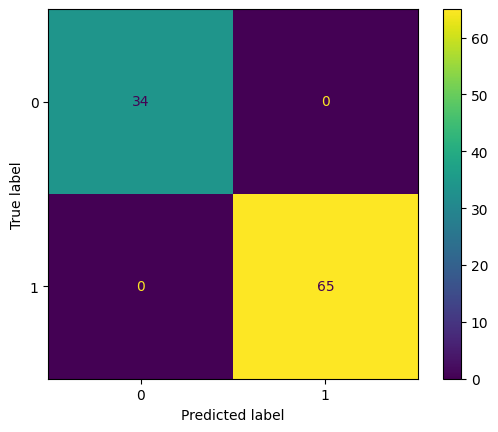

In [15]:
import matplotlib.pyplot as plt
cmDisp = ConfusionMatrixDisplay(confusion_matrix = conMat5, display_labels=[0,1])
cmDisp.plot()
plt.show()

TP(1 ячейка) - True Positive (истинно положительный результат) - верно отнесли объект к классу (главная диагональ)

FN(2 ячейка) - False Negative (ложно-отрицательный результат) - ложно исключили объект из класса

FP(3 ячейка) - False Positive (ложно-положительный результат) - ложно подтвердили принадлежность объекта к классу

TN(4 ячейка) - True Negative (истинно отрицательный результат) - характерен для бинарной классификации, а не классовой: верно исключили принадлежность к классу (обратное к TP)


In [16]:
print('3соседа\n',classification_report(yTest, yPred3))
print('5соседей\n',classification_report(yTest, yPred5))
print('7соседей\n',classification_report(yTest, yPred7))

3соседа
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.98      1.00      0.99        65

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99

5соседей
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        65

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99

7соседей
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        65

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00  

## **3. Методы регрессии:**

In [17]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#1. Выбрать в качестве X и Y числовые переменные (если требуется, нормировать данные)
scaler = StandardScaler()
X = scaler.fit_transform(df)
Y = df['oldpeak']

#2. Разбить выборку на обучающую и тестовую
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.25)

## **KNN**

In [18]:
X

array([[ 1.60030243,  0.69109474, -2.24062879, ...,  0.34482438,
        -0.87429153, -0.92533778],
       [ 1.60030243, -1.44697961, -2.24062879, ...,  1.41162482,
        -0.87429153, -0.92533778],
       [ 1.26824154, -1.44697961, -2.24062879, ..., -0.72197605,
        -0.87429153, -0.92533778],
       ...,
       [-2.16305433,  0.69109474,  0.87388018, ..., -0.72197605,
         1.21977769,  1.08068645],
       [-2.16305433, -1.44697961,  0.87388018, ..., -0.72197605,
        -0.87429153, -0.92533778],
       [-2.16305433,  0.69109474,  0.87388018, ..., -0.72197605,
         1.21977769,  1.08068645]])

In [19]:
Y

0      0.1
1      1.8
2      2.6
3      1.4
4      1.8
      ... 
292    0.0
293    1.2
294    1.6
295    1.4
296    0.0
Name: oldpeak, Length: 297, dtype: float64

In [20]:
Regr = KNeighborsRegressor(n_neighbors=5)
Regr.fit(XTrain, YTrain)
YPred = Regr.predict(XTest)
YPred

array([0.34, 0.38, 0.02, 1.76, 0.48, 1.34, 2.28, 0.62, 0.86, 0.26, 0.04,
       1.32, 0.44, 2.7 , 0.82, 0.38, 0.26, 1.24, 0.16, 0.3 , 0.  , 1.96,
       0.  , 1.64, 0.4 , 1.16, 2.28, 1.62, 0.04, 2.28, 0.36, 0.  , 1.84,
       0.8 , 0.58, 0.82, 0.18, 0.28, 0.  , 1.6 , 1.12, 0.48, 1.88, 2.64,
       0.46, 1.3 , 0.36, 0.52, 0.5 , 0.  , 0.58, 1.98, 0.66, 1.52, 2.28,
       1.16, 2.34, 1.84, 0.12, 2.08, 2.78, 2.52, 1.12, 1.26, 2.36, 0.64,
       0.22, 2.14, 1.72, 0.28, 0.26, 0.  , 0.44, 0.5 , 1.08])

In [21]:
print(np.array(YTest))

[0.  0.2 0.6 3.  0.  3.5 3.  1.5 1.2 0.  0.  1.2 0.2 4.  0.6 0.6 0.  0.6
 0.  0.  0.  1.8 0.8 2.3 0.2 0.2 2.6 3.2 0.  2.2 0.  0.  2.6 0.  1.4 0.
 0.  0.  0.  1.4 1.6 0.6 2.2 4.2 0.  0.9 0.6 1.9 1.2 0.  1.4 2.8 2.  1.2
 3.6 0.  1.6 0.8 0.  1.  4.  2.8 0.1 3.  2.9 1.6 0.7 2.5 1.  0.8 0.  0.
 1.  0.8 0.8]


In [22]:
np.c_[YPred, YTest]

array([[0.34, 0.  ],
       [0.38, 0.2 ],
       [0.02, 0.6 ],
       [1.76, 3.  ],
       [0.48, 0.  ],
       [1.34, 3.5 ],
       [2.28, 3.  ],
       [0.62, 1.5 ],
       [0.86, 1.2 ],
       [0.26, 0.  ],
       [0.04, 0.  ],
       [1.32, 1.2 ],
       [0.44, 0.2 ],
       [2.7 , 4.  ],
       [0.82, 0.6 ],
       [0.38, 0.6 ],
       [0.26, 0.  ],
       [1.24, 0.6 ],
       [0.16, 0.  ],
       [0.3 , 0.  ],
       [0.  , 0.  ],
       [1.96, 1.8 ],
       [0.  , 0.8 ],
       [1.64, 2.3 ],
       [0.4 , 0.2 ],
       [1.16, 0.2 ],
       [2.28, 2.6 ],
       [1.62, 3.2 ],
       [0.04, 0.  ],
       [2.28, 2.2 ],
       [0.36, 0.  ],
       [0.  , 0.  ],
       [1.84, 2.6 ],
       [0.8 , 0.  ],
       [0.58, 1.4 ],
       [0.82, 0.  ],
       [0.18, 0.  ],
       [0.28, 0.  ],
       [0.  , 0.  ],
       [1.6 , 1.4 ],
       [1.12, 1.6 ],
       [0.48, 0.6 ],
       [1.88, 2.2 ],
       [2.64, 4.2 ],
       [0.46, 0.  ],
       [1.3 , 0.9 ],
       [0.36, 0.6 ],
       [0.52,

In [23]:
#Метод score вычисляет коэффициент детерминации - доля дисперсии зависимой переменной, объясняемая рассматриваемой моделью, т.е. насколько хорошо полученная модель соответствует реальным данным (чем ближе к 1, тем лучше)
#коэффициент детерминации R^2:
rsq = Regr.score(XTest, YTest)
mse = ((YTest - YPred)**2).mean()
mae = np.abs(YTest - YPred).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

MSE: 0.5553493333333335, MAE: 0.5781333333333333, R2: 0.6169652381828213


In [24]:
YTest

131    0.0
130    0.2
120    0.6
283    3.0
48     0.0
      ... 
195    0.0
66     0.0
13     1.0
84     0.8
129    0.8
Name: oldpeak, Length: 75, dtype: float64

In [25]:
Y_test = YTest.to_numpy().astype(float)

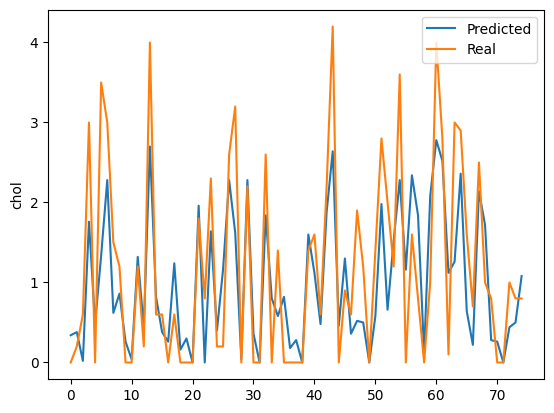

In [26]:
plt.plot(YPred)
plt.plot(Y_test)
plt.legend(["Predicted", "Real"])
plt.ylabel("chol")
plt.show()

## **Линейная**

In [69]:
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
temp = x[x["sex"] == 0][["trestbps","chol"]].to_numpy()
norm = MinMaxScaler()
temp = norm.fit_transform(temp)
trestbps = temp[:,1]
chol = temp[:,0].reshape(-1,1)

#обучение модели
linReg = linear_model.LinearRegression()
linReg.fit(chol, trestbps)

#построение предсказания
trestbpsPred = linReg.predict(chol)

print(f"Параметры прямой: b0 = {linReg.intercept_}, наклон: {linReg.coef_[0]}")
print(f"y = {linReg.intercept_} + {linReg.coef_[0]} x")

rsq = linReg.score(chol, trestbps)
mse = ((chol - trestbps)**2).mean()
mae = np.abs(chol - trestbps).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")


Параметры прямой: b0 = 0.23738663721356115, наклон: 0.13239868596134785
y = 0.23738663721356115 + 0.13239868596134785 x
MSE: 0.06404057041019379, MAE: 0.19639362488136303, R2: 0.024991954657877513


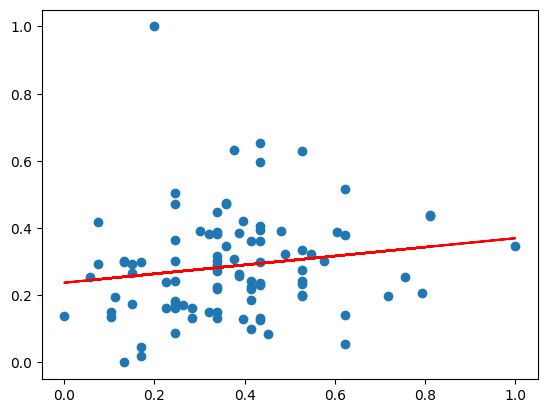

In [70]:
plt.scatter(chol, trestbps)
plt.plot(chol, trestbpsPred, color="red")

plt.show()

## **Гребневая**

In [71]:
rig = linear_model.Ridge(alpha=.5)
rig.fit(chol, trestbps)

#построение предсказания
trestbpsRigPred = rig.predict(chol)

print(f"Параметры прямой: b0 = {rig.intercept_}, наклон: {rig.coef_[0]}")
print(f"y = {rig.intercept_} + {rig.coef_[0]} x")

rsq = rig.score(chol, trestbps)
mse = ((chol - trestbps)**2).mean()
mae = np.abs(chol - trestbps).mean()
print(f"MSE: {mse}, MAE: {mae}, R2: {rsq}")

Параметры прямой: b0 = 0.24402702477725532, наклон: 0.11453179440974769
y = 0.24402702477725532 + 0.11453179440974769 x
MSE: 0.06404057041019379, MAE: 0.19639362488136303, R2: 0.024536829463611465


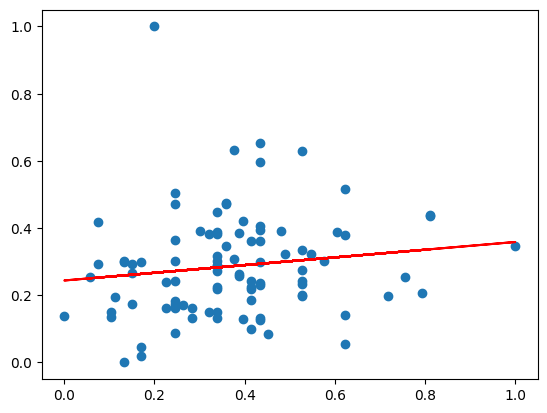

In [72]:
plt.scatter(chol, trestbps)
plt.plot(chol,trestbpsRigPred, color="red")

plt.show()

## **LASSO**

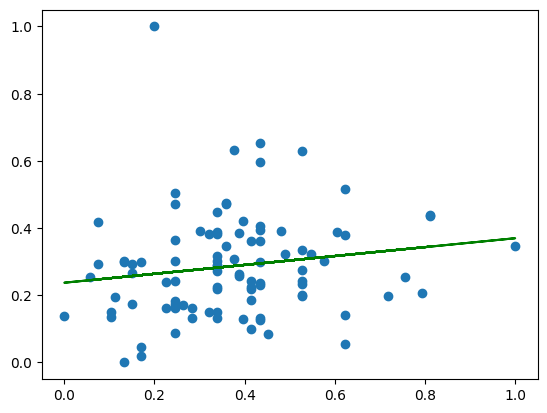

MSE: 0.022832378730150885, MAE: 0.11233979127476716, R2: 0.024991954657877735


In [73]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

lasso = Lasso()

#поиск параметра "альфа" на логарифмической сетке GridSearchCV от 10^-15 до 10^15
parameters = {"alpha" : np.logspace(-15,15,31)}
lassoCV = GridSearchCV(lasso, parameters, scoring = "neg_mean_squared_error", cv = 5)

lassoCV.fit(chol, trestbps)
lassoPred = lassoCV.predict(chol)

plt.scatter(chol, trestbps)
plt.plot(chol,lassoPred, color="green")
plt.show()

lassoMSE = ((lassoPred - trestbps)**2).mean()
lassoMAE = np.abs(lassoPred - trestbps).mean()
lassoR2 = r2_score(trestbps, lassoPred)
print(f"MSE: {lassoMSE}, MAE: {lassoMAE}, R2: {lassoR2}")

## **Логистическая**

<Axes: >

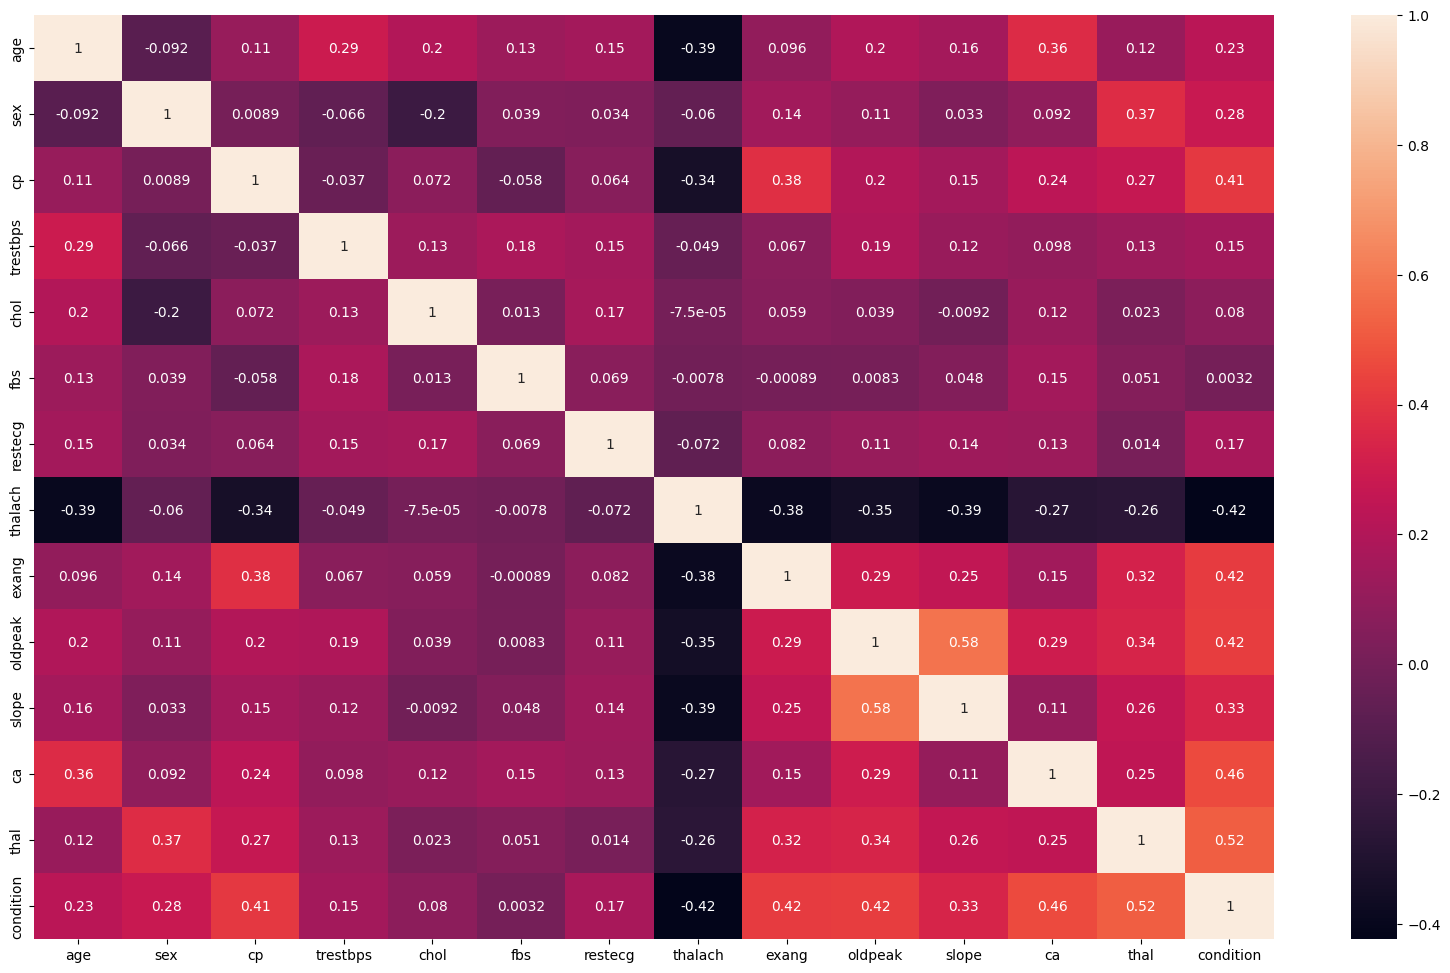

In [74]:
import seaborn as sns
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot = True)

In [97]:
#Разделим зависимую переменную и предикторы
X = df.drop("condition", axis = 1).copy()
Y = df.iloc[:,-1]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0, shuffle = True)

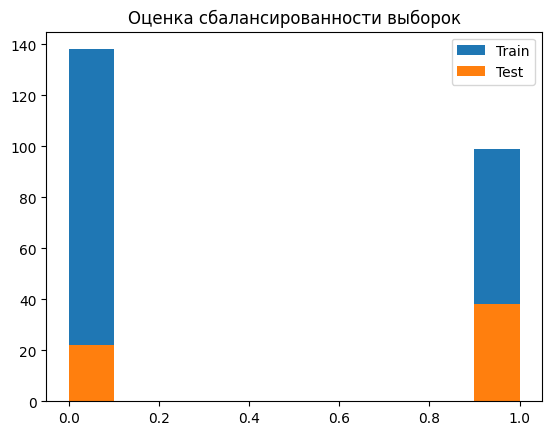

In [98]:
plt.hist(Ytrain, label = "Train")
plt.hist(Ytest, label = "Test")
plt.legend()
plt.title("Оценка сбалансированности выборок")
plt.show()

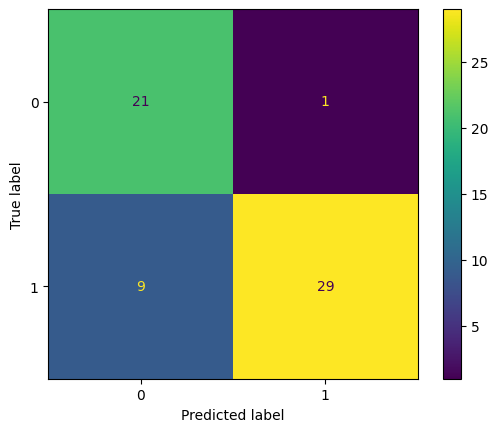

In [99]:
from sklearn.linear_model import LogisticRegression

logRes = LogisticRegression(random_state = 0, solver='liblinear', max_iter = 1000)
lrModel = logRes.fit(Xtrain, Ytrain)
Ypred = lrModel.predict(Xtest)
Yprob = lrModel.predict_proba(Xtest)[:,1] #для ROC-кривой

confMatr = confusion_matrix(Ytest, Ypred)
cmPlt = ConfusionMatrixDisplay(confusion_matrix = confMatr)
cmPlt.plot()
plt.show()

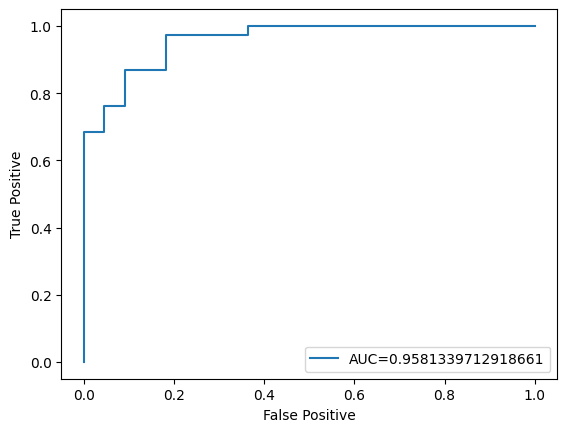

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

auc = roc_auc_score( Ytest, Yprob )
fpr, tpr, thresholds = roc_curve(Ytest, Yprob)
plt.plot(fpr, tpr, label = "AUC="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend()